读取一幅灰度图像，实现图像灰度的直方图均衡化变换，在屏幕上显示变换前、后图像，以及变换前
后图像的灰度直方图。

In [6]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"
baboon_path = "project02/proj02-images/baboon.jpg"

In [8]:
# 以灰度模型读取 baboon 图像
image_baboon = Image.open(root_path + baboon_path).convert('L')
print(type(image_baboon))
print(image_baboon.size)
print(image_baboon.mode)

<class 'PIL.Image.Image'>
(512, 512)
L


In [9]:
# 编写一个函数imageEqualization，实现图像直方图均衡化
def imageEqualization(image: Image) -> Image:
    # 读取图像的大小
    width, height = image.size
    # 读取图像的像素值
    pixels = image.load()
    # 计算图像的直方图
    hist = [0] * 256
    for i in range(width):
        for j in range(height):
            hist[pixels[i, j]] += 1
    # 计算图像的累积直方图
    cdf = [0] * 256
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    # 计算累积直方图的最小值
    min_cdf = min([x for x in cdf if x > 0])
    # 计算累积直方图的最大值
    max_cdf = max(cdf)
    # 计算累积直方图的范围
    range_cdf = max_cdf - min_cdf
    # 计算累积直方图的均衡化
    cdf_eq = [0] * 256
    for i in range(256):
        cdf_eq[i] = int(((cdf[i] - min_cdf) / range_cdf) * 255)
    # 计算均衡化后的图像
    for i in range(width):
        for j in range(height):
            pixels[i, j] = cdf_eq[pixels[i, j]]
    return image

In [10]:
# 对image_baboon进行直方图均衡化
image_baboon_enqualized = np.array(image_baboon)
image_baboon_enqualized = cv2.equalizeHist(image_baboon_enqualized)

In [11]:
# 调用imageEqualization函数对image_baboon进行直方图均衡化
image_baboon_enqualized2 = image_baboon.copy()
image_baboon_enqualized2 = imageEqualization(image_baboon_enqualized2)

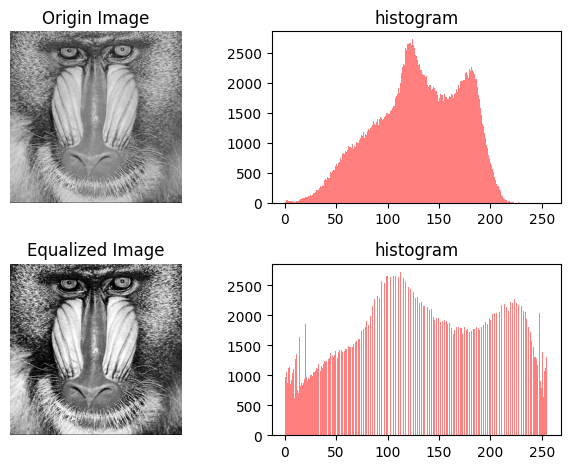

In [12]:
# 可视化原图像和直方图均衡化后的图像，同时统计灰度直方图
plt.figure()
plt.subplot(221)
plt.imshow(image_baboon, cmap='gray')
plt.title('Origin Image')
plt.axis('off')
plt.subplot(222)
plt.title("histogram")
plt.hist(np.array(image_baboon).flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
plt.subplot(223)
plt.imshow(image_baboon_enqualized2, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(224)
plt.title("histogram")
plt.hist(np.array(image_baboon_enqualized2).flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
plt.tight_layout()
plt.show()